### Reading and printing csv file

In [1]:
import pandas as pd
file = "C:\\Users\\ruchitha\\Downloads\\singapore_airlines_reviews.csv"
df = pd.read_csv(file)
df.head(20)

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
5,2024-03-10T01:16:48-05:00,Desktop,1,review,We booked our flights a full 9 months in advan...,Impossible to get a promised refund,0
6,2024-03-10T00:54:43-05:00,Desktop,5,review,This was a fascinating experience. As I sat in...,WOAH. FLY WITH SQ,0
7,2024-03-09T17:45:56-05:00,Desktop,1,review,Very bad expeirence for flight check in at bai...,Long Q to check in,0
8,2024-03-08T23:10:41-05:00,Desktop,1,review,"Respected Faculty, I am Bincy, writing this t...","Very bad, disappointed",0
9,2024-03-08T19:18:57-05:00,Desktop,1,review,I would rate Singapore airlines the worse I ha...,Give Singapore airlines a miss.,1


### Importing nlkt library to download and print stopwords

In [2]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'same', 'each', 'now', 'just', 't', 'to', 'isn', "doesn't", 'doesn', "it's", 'needn', 'all', 'was', 'i', 'this', 'until', 'off', 'them', 'again', 'is', 'will', "hadn't", 'our', 'my', 'can', 'where', 'why', 'she', 'it', 'mustn', "won't", 'yourselves', 'before', 's', 'because', 'him', "you're", 'shouldn', 'doing', 'won', 'what', 'not', 'you', 'then', 'has', 'too', 'at', 'yourself', 'he', "haven't", 'having', 'both', 'between', 'theirs', 'm', 'himself', 'those', "wouldn't", 'if', 'through', 'by', 'more', "hasn't", 'other', 'been', 'than', 'with', 'after', 'didn', 'during', "mustn't", "you'll", 'who', 'wouldn', 'do', 'from', 'yours', "you'd", 'her', 'no', 'haven', 'a', 'hers', 'd', "didn't", "aren't", 'being', 'on', 'whom', 'these', 've', "couldn't", 'itself', 'how', 'herself', 'y', 'of', 'they', 'wasn', 'in', "she's", 'while', "shan't", 'that', 'did', 'should', 'when', 'up', 'be', 'against', 'were', 'aren', 'most', 're', 'myself', "weren't", "isn't", 'don', 'an', 'have', 'mightn', "don't

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruchitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Setting pipeline that converts text to lower case and remove stop words

In [3]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

### Creating a new column 'tokens' in dataframe which has result after tokenising and removing stopwords from each row of 'text' column

In [4]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

### Counting the frequency of words after removing stopwords and tokenizing to understand the distribution of words.

In [5]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name ='token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
flight,12217
singapore,11752
airlines,7569
service,6906
food,5645
good,5298
airline,3977
time,3714
economy,3606


### Using worldcloud library to visualize the frequency of words in the text

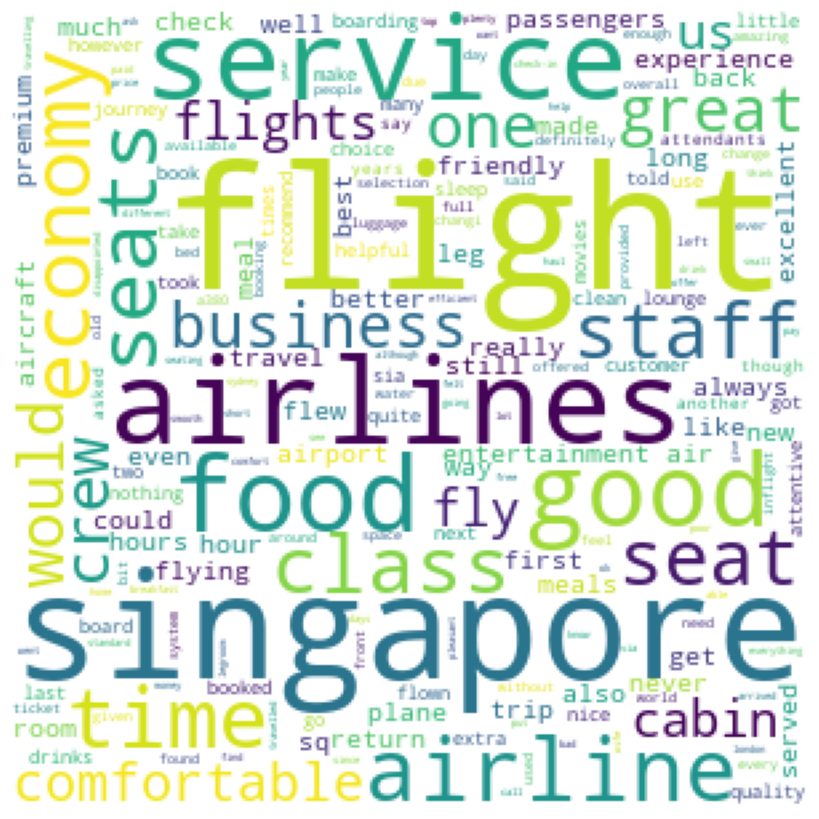

In [6]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Implementing a function 'compute_idf' to compute the idf of tokens in the dataframe

In [7]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

### Calculating TFIDF for each token in the dataframe

In [8]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
flight,12217,7645.032959
singapore,11752,7399.866698
airlines,7569,6790.719475
service,6906,5369.212662
food,5645,5050.790570


### Creating a wordcould visualization using TFIDF scores in the dataframe

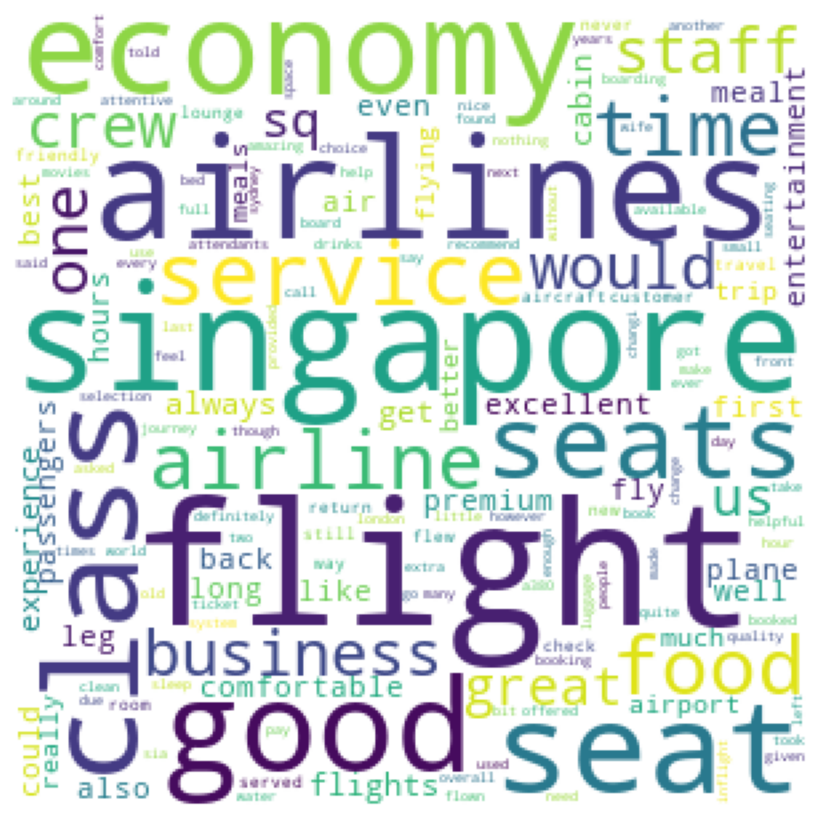

In [9]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Defining a function 'count_keywords' that takes tokens and keywords as input to count the occurance of each keyword in the token list

In [10]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [11]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

### visualizing the frequencies of keywords over the years using a heatmap generated with Seaborn.

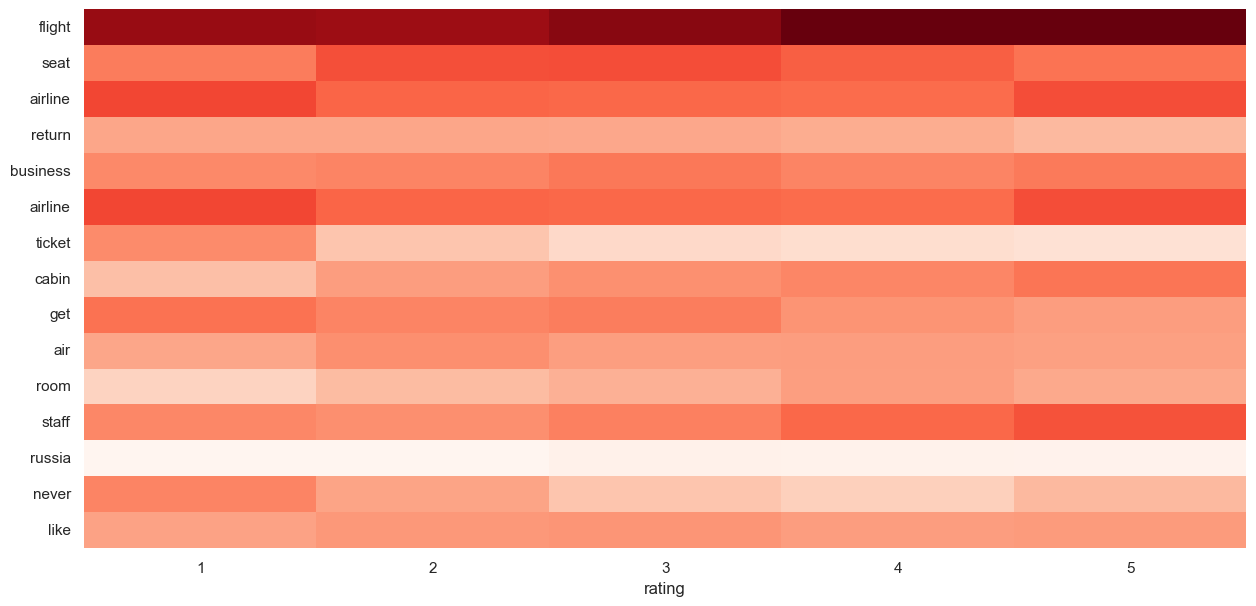

In [12]:
import seaborn as sns
keywords = ['flight', 'seat', 'airline', 'return',
            'business', 'airline', 'ticket', 'cabin', 'get', 
            'air', 'room', 'staff','russia', 'never','like']  
freq_df = count_keywords_by(df, by='rating', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('rating')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)